<a href="https://colab.research.google.com/github/argennof/EyCD2022/blob/main/Entregable_2_Nico_parte1_ejercicio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **DIPLOMATURA 2022**

# EXPLORACIÓN Y CURACIÓN DE DATOS

## Entregable # 2 Parte 1 - Ejercicio 2

## GRUPO Nº24

## INTEGRANTES:
   - Diana Fonnegra
   - Clarisa Manzone
   - Nico Rosales
   - Daniel Rubio

In [56]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd

import seaborn as sns
sns.set_context('talk')


In [57]:
pd.options.display.float_format = '{:.2f}'.format

# 1 a) Distribución de variables y eliminación de outliers:

### Pasamos a definir los conjuntos de datos

1.   *df_melb* -> Presenta los datos de los precios de las casas de Melbourne.
2.   *df_airbnb* -> Contiene los datos de los alquileres de airbnb en Melbourne.

### A su vez se seleccionan las columnas de interés para el conjunto df_airbnb:
*   *description*
*   *neighborhood_overview*
*   *street*
*   *neighborhood*
*   *city*
*   *suburb*
*   *state*
*   *zipcode*
*   *price*
*   *weekly_price*
*   *monthly_price*
*   *latitude*
*   *longitude*


In [58]:
url_1 = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv'
url_2 = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv'
df_melb = pd.read_csv(url_1)

# Definiendo filtro de columnas de interes - df_airbnb
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]

# Aplicando filtro:
df_airbnb = pd.read_csv(url_2, usecols=interesting_cols)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### * Exploramos las columnas de ambos df:

In [59]:
print(df_melb.columns)
print(df_airbnb.columns)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')
Index(['description', 'neighborhood_overview', 'street', 'neighborhood',
       'city', 'suburb', 'state', 'zipcode', 'latitude', 'longitude', 'price',
       'weekly_price', 'monthly_price'],
      dtype='object')


In [60]:
# Descripción General del conjunto df_melb:
df_melb.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,13580.00,2.94,0.96,1.00,2.00,3.00,3.00,10.00
Price,13580.00,1075684.08,639310.72,85000.00,650000.00,903000.00,1330000.00,9000000.00
Distance,13580.00,10.14,5.87,0.00,6.10,9.20,13.00,48.10
Postcode,13580.00,3105.30,90.68,3000.00,3044.00,3084.00,3148.00,3977.00
Bedroom2,13580.00,2.91,0.97,0.00,2.00,3.00,3.00,20.00
Bathroom,13580.00,1.53,0.69,0.00,1.00,1.00,2.00,8.00
Car,13518.00,1.61,0.96,0.00,1.00,2.00,2.00,10.00
Landsize,13580.00,558.42,3990.67,0.00,177.00,440.00,651.00,433014.00
BuildingArea,7130.00,151.97,541.01,0.00,93.00,126.00,174.00,44515.00
YearBuilt,8205.00,1964.68,37.27,1196.00,1940.00,1970.00,1999.00,2018.00


In [61]:
df_melb.Price.describe()

count     13580.00
mean    1075684.08
std      639310.72
min       85000.00
25%      650000.00
50%      903000.00
75%     1330000.00
max     9000000.00
Name: Price, dtype: float64

In [62]:
print(f'Consultando el total de datos nulos para la columna Price: {df_melb.Price.isnull().sum()}')

Consultando el total de datos nulos para la columna Price: 0


### Del anterior se puede notar que:

*  El precio de las casas varían desde \$85.000 dólares hasta \$9.000.000

*  Además, tenemos una desviación estandar de \$639.310.




### * Visualizamos en un boxplot la distribución de los valores (Precio):

Text(0.5, 1.0, 'Distribución de los Precios de Casas en Melbourne')

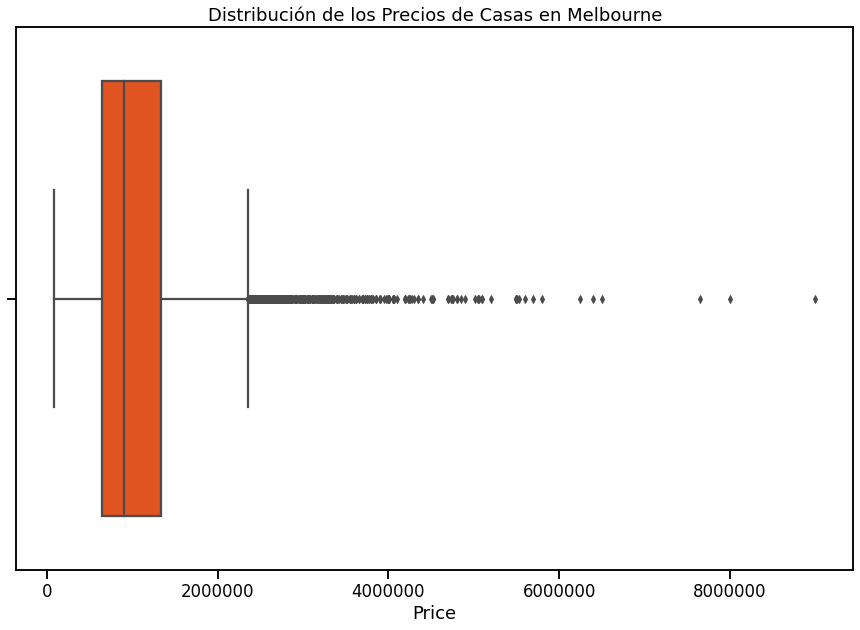

In [63]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_melb, x='Price',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')
plt.title('Distribución de los Precios de Casas en Melbourne')

### * Dada la cantidad de valores átipicos presentes en la variable precio, definimos los umbrales según los cuantiles *0.05* y *0.95*, y filtramos la informacion en función de los mismos:

In [64]:
quantile_05 = 0.05
quantile_95 = 0.95

# Filtrado a partir de cuantiles:
df_melb_perc = df_melb.loc[ (df_melb.Price > df_melb.Price.quantile(quantile_05)) \
                           & (df_melb.Price < df_melb.Price.quantile(quantile_95))]


df_melb_perc.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,12214.00,2.96,0.88,1.00,2.00,3.00,3.00,10.00
Price,12214.00,1011430.30,430553.36,406000.00,672000.00,904000.00,1290000.00,2290000.00
Distance,12214.00,10.30,5.90,0.00,6.30,9.70,13.10,48.10
Postcode,12214.00,3103.64,90.96,3000.00,3044.00,3082.00,3147.00,3977.00
Bedroom2,12214.00,2.93,0.89,0.00,2.00,3.00,3.00,20.00
Bathroom,12214.00,1.51,0.65,0.00,1.00,1.00,2.00,8.00
Car,12155.00,1.61,0.95,0.00,1.00,2.00,2.00,10.00
Landsize,12214.00,523.84,1513.17,0.00,188.25,438.00,648.00,76000.00
BuildingArea,6352.00,149.69,570.14,0.00,96.00,126.00,168.00,44515.00
YearBuilt,7280.00,1965.09,37.16,1196.00,1941.00,1970.00,2000.00,2018.00


### * Comparando los conjuntos de datos (inicial vs filtrado a partir de cuantiles):

In [65]:
print(f'Tamaño del conjunto inicial - df_melb: {len(df_melb)}')
print(f'Media del conjunto inicial - df_melb:  {df_melb.Price.mean():.2f}')
print('---- ----- ----- ------ ----- ---- ----- ----- ------ ----- \n')

print(f'Tamaño del conjunto filtrado - df_melb_perc: \t{len(df_melb_perc)}')
print(f'Media del conjunto filtrado - df_melb_perc:  \t{df_melb_perc.Price.mean():.2f}')

print(f'Filas debajo del percentil 0.05 en el conjunto inicial: \
{len(df_melb.loc[df_melb.Price < df_melb.Price.quantile(quantile_05)])}')

print(f'Filas arriba del percentil 0.95 en el conjunto inicial: \
{len(df_melb.loc[df_melb.Price > df_melb.Price.quantile(quantile_95)])}')
print('---- ----- ----- ------ ----- ---- ----- ----- ------ ----- \n')

print(f'Filas extraídas del conjunto inicial: {len(df_melb) - len(df_melb_perc)}')

Tamaño del conjunto inicial - df_melb: 13580
Media del conjunto inicial - df_melb:  1075684.08
---- ----- ----- ------ ----- ---- ----- ----- ------ ----- 

Tamaño del conjunto filtrado - df_melb_perc: 	12214
Media del conjunto filtrado - df_melb_perc:  	1011430.30
Filas debajo del percentil 0.05 en el conjunto inicial: 671
Filas arriba del percentil 0.95 en el conjunto inicial: 679
---- ----- ----- ------ ----- ---- ----- ----- ------ ----- 

Filas extraídas del conjunto inicial: 1366


### * Boxplot: distribución de los valores (Precio) - filtrado por cuantil.

Text(0.5, 1.0, 'Distribución de los Precios de Casas en Melbourne - filtrado')

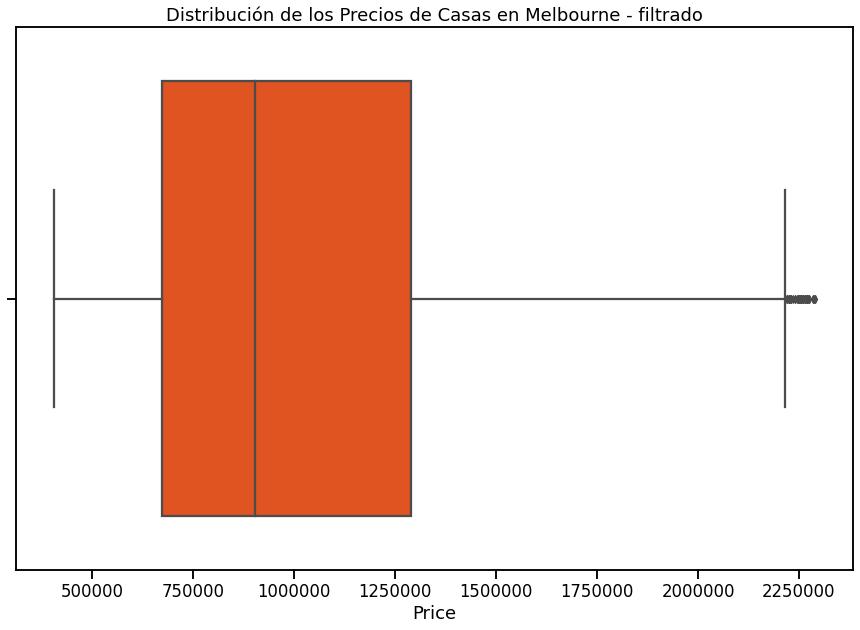

In [66]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_melb_perc, x='Price',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')
plt.title('Distribución de los Precios de Casas en Melbourne - filtrado')

### * Consultas sobre el conjunto filtrado:

In [68]:
# Habitaciones:
print(f'Máximo de habitaciones en el dataset: {df_melb_perc.Rooms.max()}')

Máximo de habitaciones en el dataset: 10


### * Se construyó un contador que separa y totaliza la cantidad de habitaciones presentes en el conjunto:

In [69]:
def contar_habitaciones(column):
  
  for hab in range(column.max()+1):
    for row in column:
    
      contador = column.loc[column == hab].sum()
    print(f'Cantidad de casas con {hab} habitaciones: {contador}')

In [70]:
contar_habitaciones(df_melb_perc.Rooms)

Cantidad de casas con 0 habitaciones: 0
Cantidad de casas con 1 habitaciones: 283
Cantidad de casas con 2 habitaciones: 6812
Cantidad de casas con 3 habitaciones: 17025
Cantidad de casas con 4 habitaciones: 9408
Cantidad de casas con 5 habitaciones: 2140
Cantidad de casas con 6 habitaciones: 330
Cantidad de casas con 7 habitaciones: 49
Cantidad de casas con 8 habitaciones: 56
Cantidad de casas con 9 habitaciones: 0
Cantidad de casas con 10 habitaciones: 10


### * Filtramos la información teniendo en cuenta aquellos registros que solo tengan una habitación:

In [71]:
df_melb_perc.loc[df_melb_perc.Rooms == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,283.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
Price,283.00,575537.28,259961.04,407000.00,440000.00,482500.00,562500.00,2115000.00
Distance,283.00,4.92,3.06,0.70,2.75,4.50,6.10,21.50
Postcode,283.00,3113.67,63.62,3000.00,3058.00,3122.00,3181.00,3207.00
Bedroom2,283.00,1.05,0.25,1.00,1.00,1.00,1.00,3.00
Bathroom,283.00,1.01,0.13,0.00,1.00,1.00,1.00,2.00
Car,280.00,0.88,0.55,0.00,1.00,1.00,1.00,4.00
Landsize,283.00,382.87,1021.57,0.00,0.00,0.00,248.50,8223.00
BuildingArea,138.00,61.06,31.23,1.00,50.00,55.00,62.00,303.00
YearBuilt,176.00,1976.82,34.46,1888.00,1960.00,1985.00,2005.00,2016.00


### * Repetimos el paso anterior esta vez teniendo en cuenta aquellos registros que tengan dos habitación:

In [72]:
df_melb_perc.loc[df_melb_perc.Rooms == 2].describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,3406.00,2.00,0.00,2.00,2.00,2.00,2.00,2.00
Price,3406.00,791766.24,311606.65,406000.00,566000.00,706000.00,930750.00,2265000.00
Distance,3406.00,7.55,4.17,0.00,4.50,7.00,10.40,38.00
Postcode,3406.00,3102.41,62.10,3000.00,3053.00,3087.00,3161.00,3782.00
Bedroom2,3406.00,2.02,0.21,0.00,2.00,2.00,2.00,5.00
Bathroom,3406.00,1.14,0.37,0.00,1.00,1.00,1.00,3.00
Car,3380.00,1.13,0.69,0.00,1.00,1.00,1.00,6.00
Landsize,3406.00,423.18,1466.31,0.00,0.00,159.00,368.00,37000.00
BuildingArea,1729.00,94.49,102.17,0.00,73.00,85.00,102.00,3558.00
YearBuilt,2107.00,1966.03,37.41,1830.00,1950.00,1970.00,2000.00,2018.00


### * Excluimos aquellos los registros en donde los baños y dormitorios superen el número de habitaciónes habitación y tomamos esto como criterio de limpieza de la base de datos:

In [73]:
df_melb_perc.loc[~(df_melb_perc.Rooms < df_melb_perc.Bedroom2 + df_melb_perc.Bathroom)].describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,249.00,3.35,0.95,2.00,3.00,3.00,4.00,8.00
Price,249.00,1046680.72,410738.50,410000.00,758500.00,970000.00,1295000.00,2250000.00
Distance,249.00,8.45,3.69,1.50,6.30,8.20,11.20,34.90
Postcode,249.00,3083.86,57.86,3000.00,3039.00,3072.00,3127.00,3207.00
Bedroom2,249.00,2.14,0.88,0.00,2.00,2.00,3.00,6.00
Bathroom,249.00,1.01,0.54,0.00,1.00,1.00,1.00,3.00
Car,249.00,1.31,0.97,0.00,1.00,1.00,2.00,5.00
Landsize,249.00,424.06,351.16,0.00,209.00,426.00,600.00,4051.00
BuildingArea,117.00,143.50,114.37,20.00,99.00,126.00,155.00,1022.00
YearBuilt,131.00,1944.38,33.72,1890.00,1920.00,1950.00,1965.00,2014.00


In [74]:
df_melb_clean = df_melb_perc.loc[df_melb_perc.Rooms < df_melb_perc.Bedroom2 + df_melb_perc.Bathroom]

In [75]:
contar_habitaciones(df_melb_clean.Rooms)

Cantidad de casas con 0 habitaciones: 0
Cantidad de casas con 1 habitaciones: 283
Cantidad de casas con 2 habitaciones: 6744
Cantidad de casas con 3 habitaciones: 16650
Cantidad de casas con 4 habitaciones: 9124
Cantidad de casas con 5 habitaciones: 2080
Cantidad de casas con 6 habitaciones: 306
Cantidad de casas con 7 habitaciones: 42
Cantidad de casas con 8 habitaciones: 40
Cantidad de casas con 9 habitaciones: 0
Cantidad de casas con 10 habitaciones: 10


In [ ]:
df_melb_recort = df_melb_clean.loc[df_melb_clean.Rooms < 7]
df_melb_recort.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,11953.00,11953.00,11953.00,11953.00,11953.00,11953.00,11894.00,11953.00,6230.00,7142.00,11953.00,11953.00,11953.00
mean,2.94,1010356.66,10.34,3104.05,2.95,1.52,1.62,525.79,149.76,1965.46,-37.81,145.00,7407.46
std,0.86,430771.84,5.93,91.51,0.87,0.64,0.95,1528.68,575.47,37.12,0.08,0.11,4371.89
min,1.00,406000.00,0.00,3000.00,1.00,0.00,0.00,0.00,0.00,1196.00,-38.18,144.49,249.00
25%,2.00,670000.00,6.30,3044.00,2.00,1.00,1.00,188.00,96.00,1945.00,-37.86,144.93,4242.00
50%,3.00,901000.00,9.70,3082.00,3.00,1.00,2.00,438.00,126.00,1970.00,-37.80,145.00,6543.00
75%,3.00,1290000.00,13.30,3148.00,3.00,2.00,2.00,649.00,168.01,2000.00,-37.75,145.06,10175.00
max,6.00,2290000.00,48.10,3977.00,20.00,8.00,10.00,76000.00,44515.00,2018.00,-37.45,145.53,21650.00


In [ ]:
print("Cantidad de habitaciones por Suburbio")
print(df_melb_perc.groupby("Rooms")["Suburb"].count())

Cantidad de habitaciones por Suburbio
Rooms
1      283
2     3406
3     5675
4     2352
5      428
6       55
7        7
8        7
10       1
Name: Suburb, dtype: int64


**Ahora vamos a analizar el conjunto de datos df_airbnb**

In [ ]:
df_airbnb.describe()

,latitude,longitude,price,weekly_price,monthly_price
count,22895.00,22895.00,22895.00,2524.00,1891.00
mean,-37.83,145.01,148.00,906.98,3234.35
std,0.07,0.13,210.88,821.22,2808.09
min,-38.22,144.48,0.00,91.00,400.00
25%,-37.85,144.96,71.00,450.00,1700.00
50%,-37.82,144.98,111.00,750.00,2800.00
75%,-37.80,145.01,165.00,1066.00,3912.50
max,-37.48,145.84,12624.00,11536.00,54258.00


In [ ]:
df_airbnb.dtypes

description               object
neighborhood_overview     object
street                    object
neighborhood              object
city                      object
suburb                    object
state                     object
zipcode                   object
latitude                 float64
longitude                float64
price                      int64
weekly_price             float64
monthly_price            float64
dtype: object

In [ ]:
df_airbnb.zipcode.value_counts()

3000.0        2491
3000           876
3006.0         860
3182.0         579
3182           556
              ... 
3096             1
3812             1
3000\n3000       1
3752             1
4068.0           1
Name: zipcode, Length: 463, dtype: int64

In [ ]:
df_airbnb = df_airbnb.loc[~(df_airbnb.zipcode.isnull())]

In [ ]:
df_airbnb['zipcode'] = pd.to_numeric(df_airbnb.zipcode, errors='coerce')

In [ ]:
len(df_airbnb.zipcode.unique())

464

In [ ]:
df_airbnb.zipcode.value_counts()

3000.00     3367
3006.00     1268
3182.00     1135
3141.00      881
3004.00      728
            ... 
3785.00        1
3096.00        1
30122.00       1
3912.00        1
4068.00        1
Name: zipcode, Length: 247, dtype: int64

In [ ]:
hist_zipcode = df_airbnb.zipcode.value_counts().to_frame(name='Cantidad de casas')

In [ ]:
hist_zipcode = hist_zipcode.rename_axis(index='zipcode')

,Cantidad de casas
zipcode,
3000.00,3367
3006.00,1268
3182.00,1135
3141.00,881
3004.00,728
...,...
3785.00,1
3096.00,1
30122.00,1


In [ ]:
print(len(hist_zipcode))
print(len(hist_zipcode.loc[hist_zipcode['Cantidad de casas'] > 300]))
print(len(hist_zipcode.loc[hist_zipcode['Cantidad de casas'] > 200]))
print(len(hist_zipcode.loc[hist_zipcode['Cantidad de casas'] > 100]))
print(len(hist_zipcode.loc[hist_zipcode['Cantidad de casas'] > 75]))
print(len(hist_zipcode.loc[hist_zipcode['Cantidad de casas'] > 50]))

247
15
23
48
60
83
